# No-Show Appointment Data - Project 1_v2

prepared by Nicole Wambui on 9th August 2022 (resubmitted version)

## Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrang">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul><li><a href="#qu">Research Question 1 </a></li>
        <li><a href="#que">Research Question 2</a></li>
        <li><a href="#ques">Research Question 3</a></li>
        <li><a href="#quest">Research Question 4</a></li> </ul>
<li><a href="#conc">Conclusions</a></li>
<li><a href="#recom">Recommendations & Further Research</a></li>
</ul>


<a id='intro'></a>
## Introduction

**Motivation**\
\
The purpose of this project os to investigate the *No Show Appointment* dataset in order to get some useful insights about health in Brazil.I personally chose to focus on health because it has been a prevalent topic over the last few years due to the ongoing pandemic.

**Research Questions**\
\
There are the questions I will be exploring with the data:
1. Are certain age groups more likely to miss their appointments?
2. Do SMS prompts increase the likelihood of patients attending their appointments?
3. Are "*Bosla Famila*" (scholarship) beneficiaries more or less likely to attend appointments? 
4. What are the highest risk factors among patients?


<a id='wrang'></a>
## Data Wrangling

**Loading the data**\
\
The data was already provided on this [link](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1532469042118000) and downloaded in .csv format.

In [1]:
import pandas as pd

appts_df = pd.read_csv('NoShowApp.csv')

**Inspecting the data**\
\
In this step, I'd like to just look at the data, see what it looks like and note down all the errors that need to be taken care of before the data can be cleaned to suit my analysis.

In [2]:
appts_df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
#check for null values in the data. We use the all() function to avoide reprinting the entire dataset with the boolean outcome.
appts_df.isnull().all()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [4]:
#We cannot assume that the number of patients and apppointments is equal, some patients might have had multiple appointments
print(appts_df['PatientId'].nunique())
print(appts_df['AppointmentID'].nunique())

62299
110527


In [5]:
appts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Because my quesitons are focused on individuals, I will have to drop duplicate values of the patient ID column and see howt his affect the dataframe.
appts_df['PatientId'].drop_duplicates(inplace=False)
appts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


*This is the first roadblock. If there are only 62299 unique patient IDs, yet after dropping duplicates the **PatientId** column remains the same, and the entire observaion numbers remain the same. It makes more sense to work with the data as it is, and only drop the patientid column to avoid confusion.*

The **ScheduledDay** and **AppointmentDay** are listed as objects, we can also go ahead and see if we can parse them as dates, and any important insights we can get.

In [7]:
appts_df['ScheduledDay'] = pd.to_datetime(appts_df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
appts_df['AppointmentDay'] = pd.to_datetime(appts_df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')
appts_df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


*Here, we can see that the appointment day has no actual time value. Calculating the difference between the scheduling and the actual appointment may have been an interesting insight, but it is not really useful as it is. Maybe if we could figure out the day of the week, we may get some other insights, but that is out of scope for this project.*

We can look at the Neighbourhoods and see if we can determin if certain neighbourhoods get more patients.

In [8]:
appts_df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

*81 Neighbourhoods would be too many to map out and so we can also safely exclude this from out dataset.

Based on the questions I have, there are a few variables I will not need such as : *patientid, appointmentid, scheduled and appointmentday, and neighbourhood.* We can focus on the variables I actually need:

In [9]:
appts_df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [10]:
#We cannot have an age that is less than 0, so let's look for values that are 0 and less than.
appts_df.query('Age<=0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34,2016-06-08,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03 15:18:44,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03 08:56:51,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No


From here, we can see that there are 3540 different observations with children listed as 0 years, a good guess would be that they are infants. The best thing we can do here is include them, but remove the entire $age = -1$ observation.

In [11]:
print(appts_df.shape) #check the number of rows
appts_df.drop(appts_df[appts_df['Age'] < 0].index, inplace = True)
print(appts_df.shape) #check the number of rows to ensure we deleted it

(110527, 14)
(110526, 14)


In [12]:
appts_df.Age.describe() #confirm the min value is now 0 and the data is valid

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Everything else is pretty much straight forward so we can go ahead and remove the other columns.

In [13]:
appts_df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'], axis=1, inplace=True)
appts_df.head(2)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No


Now we can rename the columns and save this as a new dataframe for exploratory analysis.

In [14]:
appts_df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True) #this code replaces the hyphen in "No-show" with an underscore, and converts to lowercase.

#there are also spelling errors with hypertension and handicap, we can fix that with a  simpler code.
appts_df.rename(columns={'hipertension':'hypertension','handcap':'handicap'}, inplace=True)
appts_df.head(1)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,No


In [15]:
#save as a data frame and export it.
appts_df.to_csv('NoShowApp_v2.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In this section, we will go ahead and answer the 5 research questions that we laid out in the beginning to get better insights on the data:

<ol>
<li>Do SMS prompts increase the likelihood of patients attending their appointments?</li>
<li>Are certain age groups more likely to miss their appointments?</li>
<li>Are "Bosla Famila" (scholarship) beneficiaries more or less likely to attend appointments?</li>
<li>What are the highest risk factors among patients?</li>
</ol>

In [16]:
#load the cleaned dataset as well as all the packages needed

import pandas as pd #no need to load it again, but I will do for good meaasure
import numpy as np
import seaborn as sns #this package helps us create a background for the visualisations
import matplotlib.pyplot as plt
%matplotlib inline 
#including a space after the magic(%) sign results in an error

appts_df = pd.read_csv('NoShowApp_v2.csv')
appts_df.head(1)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,No


<a id='qu'></a>
### **Question 1: Do SMS prompts increase the likelihood of patients attending their appointments?**

In [17]:
#we can create a dataframe using the function that will filter the results for us, this will help us confirm it worked later
sms_df = appts_df[(appts_df['sms_received'] == 1)]

In [18]:
sms_df.sms_received.value_counts() #confirm it is only showing results where the sms was received

1    35482
Name: sms_received, dtype: int64

In [19]:
#we can now query the same data frame to get value counts for "no-shows", this will give us the number of those who attended and those who didn't
print(sms_df['no_show'].value_counts()) #print this to know how many were no shows and how many were not for plotting.
no_shows_df1 = sms_df['no_show'].value_counts()
print((no_shows_df1[0]),(no_shows_df1[1])) #confirm we can print the output if we create a vector since there are only 2 possible outcomes

No     25698
Yes     9784
Name: no_show, dtype: int64
25698 9784


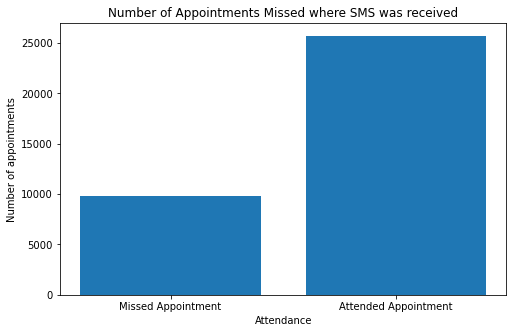

In [21]:
colors = ['blue'] #not necessary at the moment, but it will be later
plt.subplots(figsize=(8, 5))
plt.bar(("Missed Appointment", "Attended Appointment"),[no_shows_df1[1], no_shows_df1[0]])
plt.title('Number of Appointments Missed where SMS was received')
plt.xlabel('Attendance')
plt.ylabel('Number of appointments');

> $9,784$ appointments were missed  and $25,698$ were attended for those who received sms's.

We can now plot the number of people who didn't receive sms's and look at their attendance.

In [22]:
sms_df2 = appts_df[(appts_df['sms_received'] == 0)]
sms_df2.sms_received.value_counts()

0    75044
Name: sms_received, dtype: int64

In [23]:
print(sms_df2['no_show'].value_counts())
no_shows_df2 = sms_df2['no_show'].value_counts()
print((no_shows_df2[0]),(no_shows_df2[1]))

No     62509
Yes    12535
Name: no_show, dtype: int64
62509 12535


In [24]:
#let's create a handy function to make plotting easier 

def plt_labels(a,b,c):
    plt.title(a)
    plt.xlabel(b)
    plt.ylabel(c)

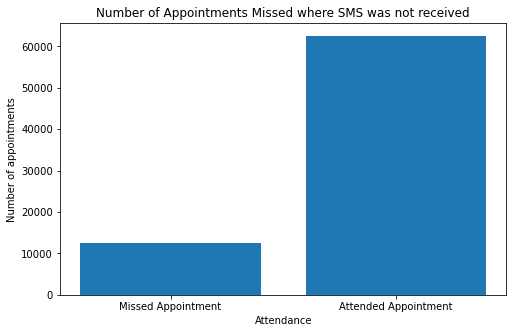

In [25]:
colors = ['blue'] #not necessary at the moment, but it will be later
plt.subplots(figsize=(8, 5))
plt.bar(("Missed Appointment", "Attended Appointment"),[no_shows_df2[1], no_shows_df2[0]])
plt_labels('Number of Appointments Missed where SMS was not received','Attendance','Number of appointments') 
#the function lets us call it(plt_labels) instead of having to write out 3 similar lines fo code for each plot label

>$12,535$ appointments were missed whereas $62,509$ were attended despite not getting an sms.

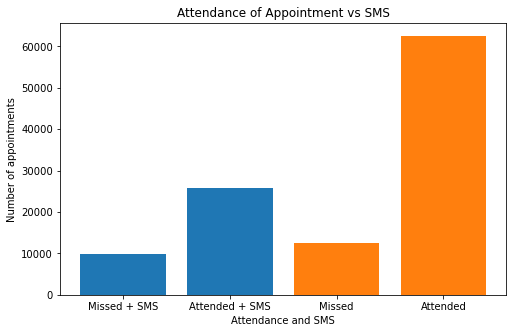

In [26]:
colors = ['blue','orange'] #blue is for sms received and orange is for sms not received. We want to plot them together.
plt.subplots(figsize=(8, 5))
plt.bar(("Missed + SMS", "Attended + SMS"),[no_shows_df1[1], no_shows_df1[0]])
plt.bar(("Missed", "Attended"),[no_shows_df2[1], no_shows_df2[0]])
plt_labels('Attendance of Appointment vs SMS', 'Attendance and SMS','Number of appointments')

> **Answer:**
> 
> Receiving an sms does not improve the likelihood of attending an appointment. We can, however, suggest that sms prompts reduce the number of missed appointments.

<a id='que'></a>
## **Question 2: Are certain age groups more likely to miss their appointments?**

In order to answer this question, we need to create age categories before we can plot this.

In [27]:
#to create the age groups, we can either create set categories i.e 0-10,10-20 etc. or use the dataset's own values using the describe() function.
appts_df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [28]:
#we will use the min, 25thpercentile, median, 75thpercentile and max as our category boundaries/edges.

ages = (appts_df.age.describe()) #create a new dataframe
age_groups = [ages[3], ages[4], ages[5], ages[6], ages[7]] #create age group categories as vectors and put them in a list
age_group_names = ['0-18 yrs', '19-37 yrs', '38-55 yrs', '56-115 yrs'] #create category names, these will be used later

In [29]:
appts_df['age_categories'] = pd.cut(appts_df['age'], age_groups, labels=age_group_names) #create a new column called age_categories
appts_df.head(7) #confirm the column was successfuly created

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_categories
0,F,62,0,1,0,0,0,0,No,56-115 yrs
1,M,56,0,0,0,0,0,0,No,56-115 yrs
2,F,62,0,0,0,0,0,0,No,56-115 yrs
3,F,8,0,0,0,0,0,0,No,0-18 yrs
4,F,56,0,1,1,0,0,0,No,56-115 yrs
5,F,76,0,1,0,0,0,0,No,56-115 yrs
6,F,23,0,0,0,0,0,0,Yes,19-37 yrs


In [30]:
age_data = appts_df[(appts_df['no_show'] == "Yes")] #create a dataframe with filtered values of all missed appointments
print(age_data['age_categories'].value_counts()) #print the numbers of the ages so that we can plot this later
age_data = age_data['age_categories'].value_counts() 

19-37 yrs     6414
0-18 yrs      5708
38-55 yrs     5255
56-115 yrs    4303
Name: age_categories, dtype: int64


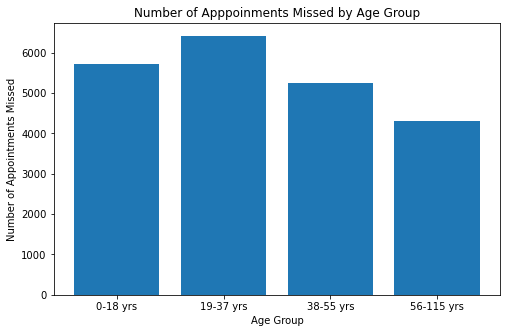

In [31]:

#we are first of all interested in the general number of appointments for each
plt.subplots(figsize=(8, 5))
plt.bar(("0-18 yrs", "19-37 yrs", "38-55 yrs", "56-115 yrs"),[age_data[1], age_data[0], age_data[2], age_data[3]])
plt_labels('Number of Apppoinments Missed by Age Group', 'Age Group','Number of Appointments Missed')

> **Answer:**
>
>People within the age group of $19$ to $37$ years are more likely to miss an appointment, followed by people within the $0$ to $18$ years age group.

<a id='ques'></a>
### Question 3: Are "*Bosla Famila*" (scholarship) beneficiaries more or less likely to attend appointments?

In [32]:
#we need to first filter the data set to look at people who are scholarship beneficiaries and people who aren't.
#we can plot this all at once using the same method we used in the first research question.
schol_df1 = appts_df[(appts_df['scholarship'] == 1)]
schol_df2 = appts_df[(appts_df['scholarship'] == 0)] #create 2 different data frames focusing on scholarship status

In [33]:
print(schol_df1['no_show'].value_counts()) #print this to know how many were no shows and how many were not for plotting.
appts_schol_1 = schol_df1['no_show'].value_counts()
print((appts_schol_1[0]),(appts_schol_1[1])) #print this to ensure the vectors work

No     8283
Yes    2578
Name: no_show, dtype: int64
8283 2578


In [34]:
#we'll do the same thing again for the non-beneficiaries (schol_df2)
print(schol_df2['no_show'].value_counts()) 
appts_schol_2 = schol_df2['no_show'].value_counts()
print((appts_schol_2[0]),(appts_schol_2[1]))

No     79924
Yes    19741
Name: no_show, dtype: int64
79924 19741


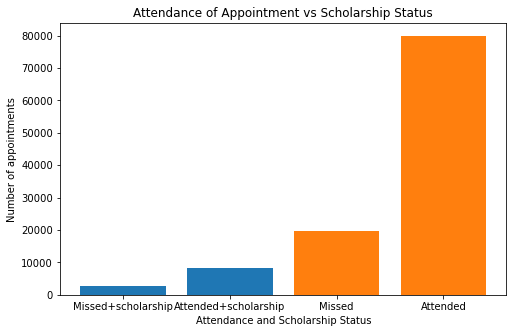

In [35]:
#we can now go ahead and plot these two side-by-side for a more efficient visualisation

colors = ['blue','orange'] #blue is for scholarship beneficiaries and orange is for sms non beneficiaries
plt.subplots(figsize=(8, 5))
plt.bar(("Missed+scholarship", "Attended+scholarship"),[appts_schol_1[1], appts_schol_1[0]])
plt.bar(("Missed", "Attended"),[appts_schol_2[1], appts_schol_2[0]])
plt_labels('Attendance of Appointment vs Scholarship Status','Attendance and Scholarship Status', 'Number of appointments')

In [36]:
#there seem to be significantly more non-beneficiaries than beneficiaries. We can try to figure out how many
schol_df = schol_df2.shape[0] - schol_df1.shape[0]
print(schol_df)

88804


>Scholarship beneficiaries miss fewer appointments. However, there are far fewer beneficiaries of the scolarship than non-beneficiaries. There are exactly $88,804$ more non-beneficiaries than beneficiaries.

In [37]:
#We can try to find the difference in missed vs. attended appointments for beneficiaries and non-beneficiaries for a more conclusive answer
beneficiaries_df = appts_schol_2[0] - appts_schol_2[1] #will calculate difference for attended appointments and save in dataframe
nonbeneficiaries_df = appts_schol_1[0] - appts_schol_1[1] #will calculate difference for misseded appointments and save in dataframe

In [38]:
print(beneficiaries_df)
print(nonbeneficiaries_df)

60183
5705


> **Answer:**
>
> When comparing those who missed their appointments between beneficiaries and non-beneficiaries the differences were:
><ul>
  <li> The difference between attended and missed appointments was $60,183$ for non-beneficiaries.
  <li> The difference between attended and missed appointments was $5,70$ for beneficiaries.
></ul>
>
>We can suggest that a fewer number of beneficiaries miss appointments in comparison to non-beneficiaries.

<a id='quest'></a>
### Question 4: What are the highest risk factors among patients?

This question serves as my univariate anlaysis and I will simply be exploring the 4 risk factors present in the dataset:
1. Hypertension
2. Diabetes
3. Alcoholism
4. Handicap

In [39]:
#we will first look at the handicap column because to have a better understanding of the data
print(appts_df.hypertension.value_counts())
print(appts_df.diabetes.value_counts())
print(appts_df.alcoholism.value_counts())
print(appts_df.handicap.value_counts())

0    88725
1    21801
Name: hypertension, dtype: int64
0    102583
1      7943
Name: diabetes, dtype: int64
0    107166
1      3360
Name: alcoholism, dtype: int64
0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64


We can see that the handicap colum has 3 values, most likely related to the level/type of handicap. We need to handle this data slightly differently before we can plot it.

In [40]:
#we'll create data frames from the above code to simplofy the plotting
hypertension = appts_df.hypertension.value_counts() #Map the diseases to different variables to plot them. The general syntax will be df[1] for plotting
diabetes = appts_df.diabetes.value_counts()
alcoholism = appts_df.alcoholism.value_counts()

In [41]:
#we'll use the sum of the vectors as the full data frame for the handicap column i.e.
ha = appts_df.handicap.value_counts()
handicap = ha[1]+ha[2]+ha[3] #this data frame includes the added values of the last 3 unique coutns of the handicap column

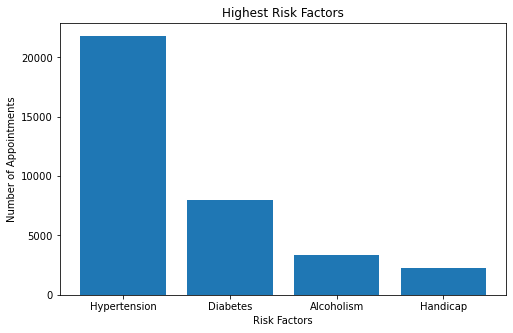

In [42]:
color=['array'] #choose different colours for each column
plt.subplots(figsize=(8, 5))
plt.bar(("Hypertension", "Diabetes","Alcoholism","Handicap"),[hypertension[1], diabetes[1], alcoholism[1], handicap])
plt_labels('Highest Risk Factors','Risk Factors','Number of Appointments')

> Here, we can see that **Hypertension** is the highest risk factor associated with appointments.

In [43]:
#we will now deep dive into hypertension and gain some statistics.

hypertension_df = appts_df[(appts_df['hypertension'] == 1)]

In [44]:
hypertension_df.head(5)

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_categories
0,F,62,0,1,0,0,0,0,No,56-115 yrs
4,F,56,0,1,1,0,0,0,No,56-115 yrs
5,F,76,0,1,0,0,0,0,No,56-115 yrs
25,M,46,0,1,0,0,0,1,No,38-55 yrs
26,F,45,0,1,0,0,0,0,No,38-55 yrs


We can see something quite interesting here. One patient appears to have diabetes as well. We can investigate even further.

In [45]:
hypertension_df[(hypertension_df['diabetes'] == 1)]

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_categories
4,F,56,0,1,1,0,0,0,No,56-115 yrs
36,F,63,0,1,1,0,0,0,No,56-115 yrs
37,F,64,1,1,1,0,0,0,No,56-115 yrs
44,F,78,0,1,1,0,0,0,Yes,56-115 yrs
47,F,39,0,1,1,0,0,0,No,38-55 yrs
...,...,...,...,...,...,...,...,...,...,...
110358,F,70,0,1,1,0,0,0,No,56-115 yrs
110447,F,40,0,1,1,0,0,1,No,38-55 yrs
110455,F,79,0,1,1,0,0,0,No,56-115 yrs
110467,F,76,0,1,1,0,0,1,No,56-115 yrs


In [46]:
hypertension_df[(hypertension_df['alcoholism'] == 1)]

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_categories
46,M,58,0,1,0,1,0,1,No,56-115 yrs
186,M,66,0,1,0,1,0,0,No,56-115 yrs
381,F,54,0,1,0,1,0,0,No,38-55 yrs
384,M,63,0,1,0,1,0,0,No,56-115 yrs
746,F,56,0,1,0,1,0,0,No,56-115 yrs
...,...,...,...,...,...,...,...,...,...,...
109885,M,71,0,1,0,1,0,0,Yes,56-115 yrs
109911,M,56,0,1,1,1,0,0,No,56-115 yrs
110070,M,54,0,1,0,1,0,1,No,38-55 yrs
110167,M,50,0,1,1,1,0,0,Yes,38-55 yrs


In [47]:
hypertension_df[(hypertension_df['handicap'] == 1)]

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_categories
147,F,65,0,1,0,0,1,0,No,56-115 yrs
189,F,77,0,1,0,0,1,0,No,56-115 yrs
199,M,62,0,1,1,0,1,0,No,56-115 yrs
211,F,56,0,1,0,0,1,0,No,56-115 yrs
238,F,65,0,1,1,0,1,1,No,56-115 yrs
...,...,...,...,...,...,...,...,...,...,...
109743,M,28,0,1,0,0,1,1,Yes,19-37 yrs
109776,M,80,0,1,1,0,1,1,Yes,56-115 yrs
109790,M,66,0,1,0,0,1,0,No,56-115 yrs
109853,F,58,0,1,1,0,1,1,No,56-115 yrs


In [48]:
hypertension_df[(hypertension_df['alcoholism'] == 1)|(hypertension_df['diabetes'] == 1)|(hypertension_df['handicap'] == 1)]

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_categories
4,F,56,0,1,1,0,0,0,No,56-115 yrs
36,F,63,0,1,1,0,0,0,No,56-115 yrs
37,F,64,1,1,1,0,0,0,No,56-115 yrs
44,F,78,0,1,1,0,0,0,Yes,56-115 yrs
46,M,58,0,1,0,1,0,1,No,56-115 yrs
...,...,...,...,...,...,...,...,...,...,...
110358,F,70,0,1,1,0,0,0,No,56-115 yrs
110447,F,40,0,1,1,0,0,1,No,38-55 yrs
110455,F,79,0,1,1,0,0,0,No,56-115 yrs
110467,F,76,0,1,1,0,0,1,No,56-115 yrs


In [49]:
hypertension_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21801 entries, 0 to 110514
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          21801 non-null  object  
 1   age             21801 non-null  int64   
 2   scholarship     21801 non-null  int64   
 3   hypertension    21801 non-null  int64   
 4   diabetes        21801 non-null  int64   
 5   alcoholism      21801 non-null  int64   
 6   handicap        21801 non-null  int64   
 7   sms_received    21801 non-null  int64   
 8   no_show         21801 non-null  object  
 9   age_categories  21801 non-null  category
dtypes: category(1), int64(7), object(2)
memory usage: 1.7+ MB


In [50]:
(6846 +1327+ 883) == 8098 #number of rows from this function hypertension_df[(hypertension_df['alcoholism'] == 1)|(hypertension_df['diabetes'] == 1)|(hypertension_df['handicap'] == 1)]

False

In [51]:
(6846 +1327+ 883) #totaling the figures gotten from these codes hypertension_df[(hypertension_df['handicap'] == 1)] for each risk factor

9056

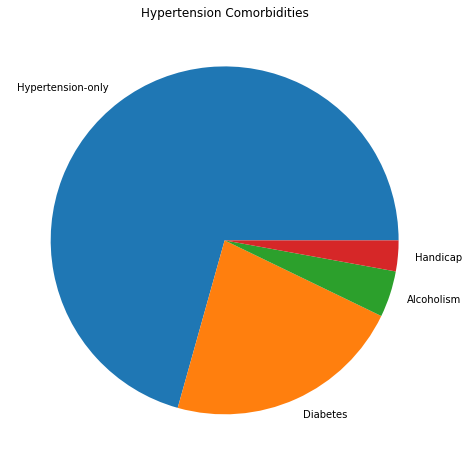

In [59]:
#we'll now try to plot these comorbidities in a pie chart (6846-diabtes, 1327-alcoholism, 883-handicap)

figures = np.array([21801, 6846, 1327, 883])

color=['array'] #choose different colours for each column
plt.subplots(figsize=(8, 8))
plt.pie(figures, labels = ["Hypertension-only", "Diabetes","Alcoholism","Handicap"])
plt.title('Hypertension Comorbidities'); #we won't call the plt_label function because pie chart parameters are different

>**Answer:**
>Hypertension is the most common risk factor.
>
> Of the $21,801$ people who have hypertension, $6486$ have diabetes, $1327$ suffer from alcoholism and $883$ have a handicap. While the above outputs do not match, we can suggest that people who suffer from hypertension are likely to present other risk factors. This could explain why they have many appointments.

<a id='conc'></a>
## Conclusions

From this dataset, it can be suggested that:
1. SMS prompts do not neccessarily increase the likelihood of attending appointments, but there was a noticable reduction in the number of appointments missed for those who had SMS prompts.

2. People between the ages of 19 to 37 are more likely to miss their appointments.

3. People who are beneficiaries of *Bosla Famila* are less likely to miss their appointments.

4. Hypertension is the most prevalent risk factor,

5. People with Hypertension and another risk factor are most likely to present with Diabetes.

<a id='recom'></a>
## Recommendations for Further Analysis

It would be best to first state the limitations of this analysis. First of all, differences in gender and region were not accounted for. Secondly, there was no consideration for the date of the scheduling and the actual appointment. This was mostly because the preliminary analysis showed that the data had negative values when trying to caluclate the differnce in days. This was not explored any further due to time contraints.

It would be a worthy endevour to investigate the following:
- Specific days or times where most appointments are missed.
- The number of *Bosla Famila* subscriptions per region.
- The correlation between age and risk factors.
- The relationship between risk factors and likelihood of missed appointments.
